Data Diri

Nama: Adhi Viari Nugraha

username: adhi237

Email: viariadhi@gmail.ocm

In [ ]:
#importing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

In [ ]:
#mengunggah dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-19 13:29:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.76MB/s    in 48s     

2021-07-19 13:30:02 (6.36 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'

#train directory
train_dir = os.path.join(base_dir, 'train')

#validation directory
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['train',
 'val',
 'scissors',
 'rps-cv-images',
 'rock',
 'paper',
 'README_rpc-cv-images.txt']

In [ ]:
rock_dir = os.path.join('/tmp/rockpaperscissors/rock')
paper_dir = os.path.join('/tmp/rockpaperscissors/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/scissors')

#splitting the directory to train and validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2 ) #test_size 0.4 karena validation set harus 40% dari total dataset
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
if not os.path.exists(train_rock):
    os.mkdir(train_rock)
if not os.path.exists(train_paper):
    os.mkdir(train_paper)
if not os.path.exists(train_scissors):
    os.mkdir(train_scissors)

if not os.path.exists(val_rock):
    os.mkdir(val_rock)
if not os.path.exists(val_paper):
    os.mkdir(val_paper)
if not os.path.exists(val_scissors):
    os.mkdir(val_scissors)

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train'))

3

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

0

In [ ]:
import shutil

#copying data train
for i in train_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))

#copying data train
for i in val_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

580

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

146

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

569

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

143

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

600

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

150

Train Set sudah 80% dan test/validation set sudah 20%

In [ ]:
#Image Data Generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap', #menggunakan wrap 
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap', #menggunakan wrap
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical',
        shuffle=True
        )

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical'
        )

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #using softmax because its multiclass
])

In [ ]:
#compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAccuracy above 92%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#latih model dengan model.fit
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks = [callbacks]
)

Epoch 1/20
25/25 - 38s - loss: 1.0907 - accuracy: 0.3866 - val_loss: 0.9462 - val_accuracy: 0.5437
Epoch 2/20
25/25 - 7s - loss: 0.9137 - accuracy: 0.6263 - val_loss: 0.6835 - val_accuracy: 0.8125
Epoch 3/20
25/25 - 7s - loss: 0.5116 - accuracy: 0.8340 - val_loss: 0.2943 - val_accuracy: 0.8938
Epoch 4/20
25/25 - 6s - loss: 0.2457 - accuracy: 0.9113 - val_loss: 0.2641 - val_accuracy: 0.9312
Epoch 5/20
25/25 - 6s - loss: 0.2473 - accuracy: 0.9212 - val_loss: 0.2435 - val_accuracy: 0.9375

Accuracy above 92%, finish training!


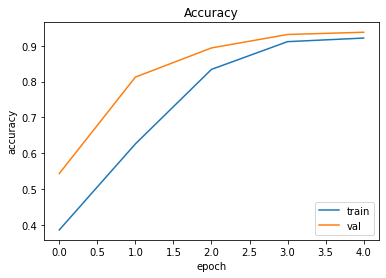

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

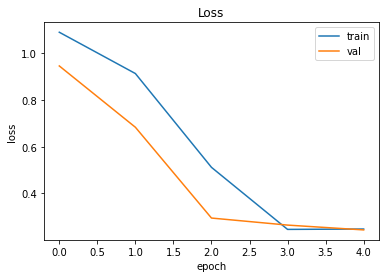

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmplwo_gvtf/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
#menyimpan as hdf5 file
model.save('my_model.pb')
%cd

INFO:tensorflow:Assets written to: my_model.pb/assets


INFO:tensorflow:Assets written to: my_model.pb/assets


/root
